In [34]:
import pandas as pd

df = pd.read_csv('cinema.csv')
df.head(3) # 先頭3行の中身を表示

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


In [35]:
df.isnull().any(axis = 0)

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

In [36]:
# 欠損値を平均で補完して、df2に代入
df2 = df.fillna(df.mean())
# 穴埋めができたか確認
df2.isnull().any(axis = 0)

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

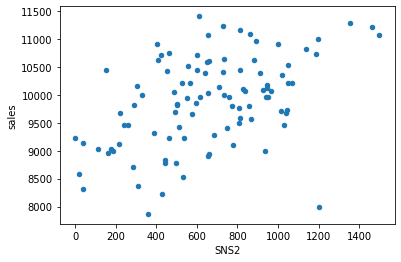

In [37]:
# JupyterLab上にグラフ描画するためのおまじない
%matplotlib inline

# SNS2とsalesの散布図の作成
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')

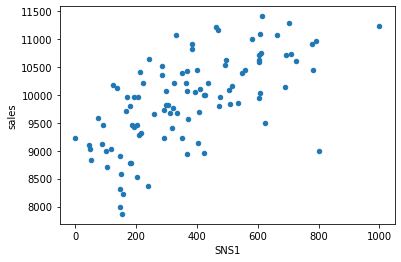

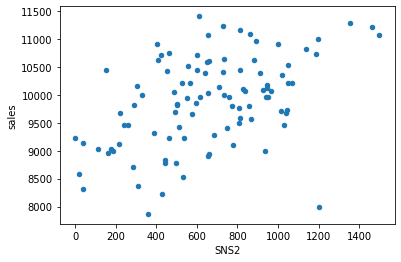

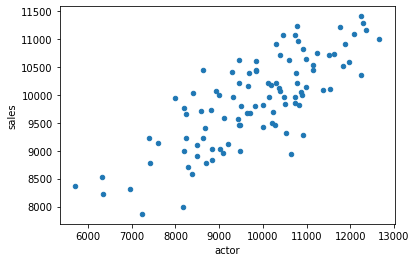

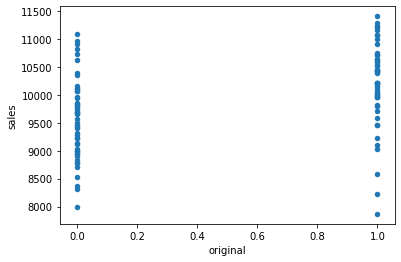

In [38]:
df2.plot(kind = 'scatter', x = 'SNS1', y = 'sales')
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')
df2.plot(kind = 'scatter', x = 'actor', y = 'sales')
df2.plot(kind = 'scatter', x = 'original', y = 'sales')

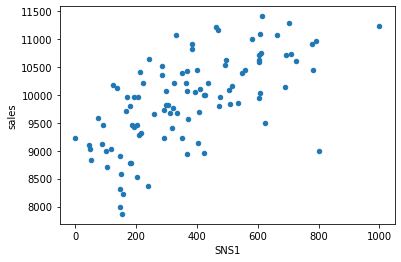

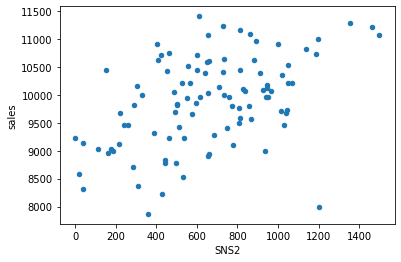

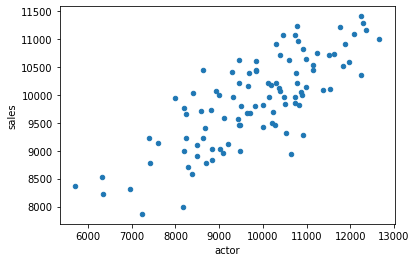

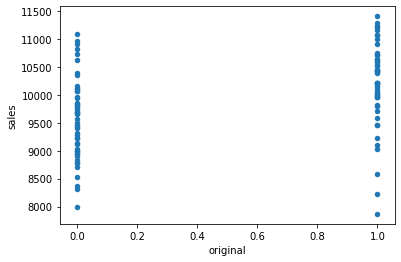

In [39]:
for name in df.columns:
#for name in df: でも可

    # x軸がcinema_id列とsales列の散布図は
    #作っても意味が無いので外す
    if name == 'cinema_id' or name == 'sales':
        continue

    df2.plot(kind = "scatter", x = name, y = "sales")

In [40]:
no = df2[(df2['SNS2'] > 1000) & (df2['sales'] < 8500)].index
df3 = df2.drop(no, axis = 0)

In [41]:
test = pd.DataFrame(
{'Acolumn':[1,2,3],
 'Bcolumn':[4,5,6]
}
)

In [42]:
test[test['Acolumn'] < 2]

,Acolumn,Bcolumn
0,1,4


In [43]:
test['Acolumn'] < 2

0     True
1    False
2    False
Name: Acolumn, dtype: bool

In [44]:
df[(df['SNS2'] > 1000 ) & (df['sales'] < 8500)]

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


In [45]:
no = df2[(df['SNS2'] > 1000 ) & (df['sales'] < 8500)].index
no

Int64Index([30], dtype='int64')

In [46]:
test.drop(0,axis=0)

,Acolumn,Bcolumn
1,2,5
2,3,6


In [47]:
test.drop('Bcolumn',axis=1)

,Acolumn
0,1
1,2
2,3


In [48]:
df3 = df2.drop(no, axis = 0) # 外れ値の行を削除
df3.shape # 行が削除できたかどうかを行数で確認

(99, 6)

In [49]:
#特徴量の列の候補
col =['SNS1','SNS2','actor','original']
x=df3[col] #特徴量の抜き出し

t=df3['sales']#正解データの取り出し

In [50]:
# インデックスが2、列がSNS1のマスの値のみ参照
df3.loc[2, 'SNS1']

158.0

In [51]:
index = [2, 4, 6] # インデックス
col = ['SNS1', 'actor'] # 列名
df3.loc[index, col]

,SNS1,actor
2,158.0,6340.388534
4,209.0,10908.539550
6,153.0,7237.639848


In [52]:
sample = [10, 20, 30, 40] # リストの作成
sample[1:3] # 添え字が1以上3未満の要素を取得

[20, 30]

In [53]:
# 0行目以上2行目以下、actor列より左の列（actor列含む）
df3.loc[0:3, :'actor']

,cinema_id,SNS1,SNS2,actor
0,1375,291.0,1044,8808.994029
1,1000,363.0,568,10290.709370
2,1390,158.0,431,6340.388534
3,1499,261.0,578,8250.485081


In [54]:
x = df3.loc[ : , 'SNS1':'original'] # 特徴量の取り出し
t = df3['sales'] # 正解ラベルの取り出し

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [57]:
model.fit(x_train, y_train)

LinearRegression()

In [58]:
new = [[150, 700, 300, 0]] # 新しいデータを2次元リストで作成
model.predict(new) # 学習済みモデルで推論

array([6874.109753])

In [59]:
model.score(x_test, y_test)

0.7903881596570095

In [60]:
# 関数のインポート
from sklearn.metrics import mean_absolute_error

pred = model.predict(x_test)

# 平均絶対誤差の計算
mean_absolute_error(y_pred = pred, y_true = y_test)

277.12236964086213

In [61]:
import pickle

with open('cineama.pkl', 'wb') as f:
    pickle.dump(model, f)

In [62]:
print(model.coef_) # 計算式の係数の表示
print(model.intercept_) # 計算式の切片の表示

[  1.07645622   0.53400191   0.28473752 213.95584503]
6253.418729438708


In [63]:
tmp = pd.DataFrame(model.coef_) # データフレームの作成
tmp.index = x_train.columns # 列名をインデックスに指定
tmp

,0
SNS1,1.076456
SNS2,0.534002
actor,0.284738
original,213.955845


# 演習問題

In [64]:
import pandas as pd

df = pd.read_csv('ex3.csv')

In [65]:
df.head(5)

,x0,x1,x2,x3,target
0,1.000943,2.114344,-1.148213,-0.051415,77.147293
1,1.505901,-0.626081,3.041686,-0.587336,278.595852
2,-0.390320,0.283607,-0.940359,-2.154124,-71.039904
3,-0.167273,1.413624,-0.632571,-1.016131,42.193870
4,-0.728801,1.370530,0.168298,-1.203904,89.167955


In [66]:
df.isnull().sum()

x0        2
x1        0
x2        2
x3        0
target    0
dtype: int64

In [67]:
df2 = df.fillna(df.median())

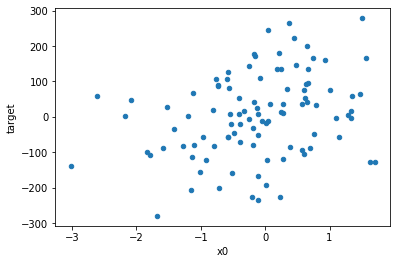

In [68]:
%matplotlib inline
df2.plot(kind = 'scatter', x = 'x0', y = 'target')

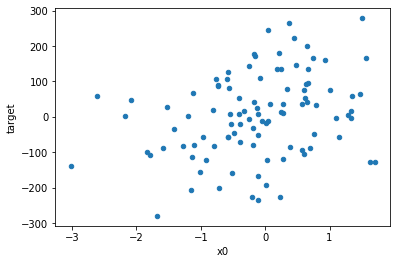

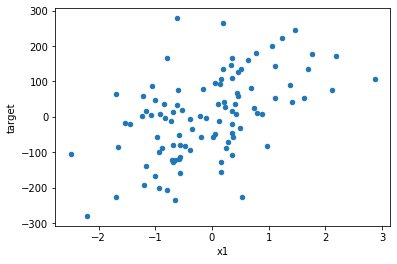

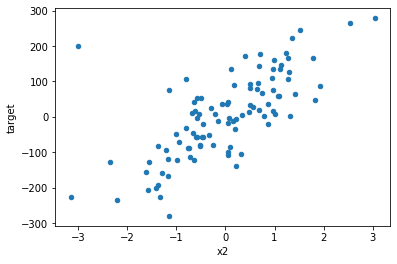

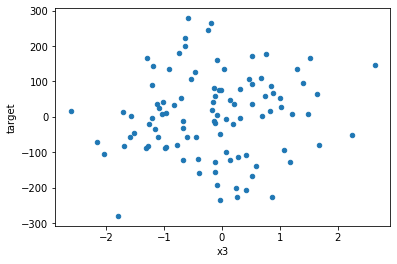

In [69]:
for name in df.columns:
    if name == 'target':
        continue
    df2.plot(kind = 'scatter', x = name, y = 'target')

In [70]:
no = df2[ (df2['x2'] < -2) & (df2['target'] > 100)].index

df3 = df2.drop(no, axis = 0)

In [71]:
x = df3.loc[:, :'x3']
t = df3['target']

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 1)

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [74]:
model.score(x_test, y_test)

0.9820345074421969